# k-NN (k Nearest Neighbors) или k ближайших соседей

Метод ближайшего соседа:
- классификация и регрессия;
- практические вопросы: к, расстояние, связь, ошибки в данных
- оптимальность и допущения.

In [1]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

Два класса: красные и синие объекты. Появился новый объект, надо решить к какому его отнести.

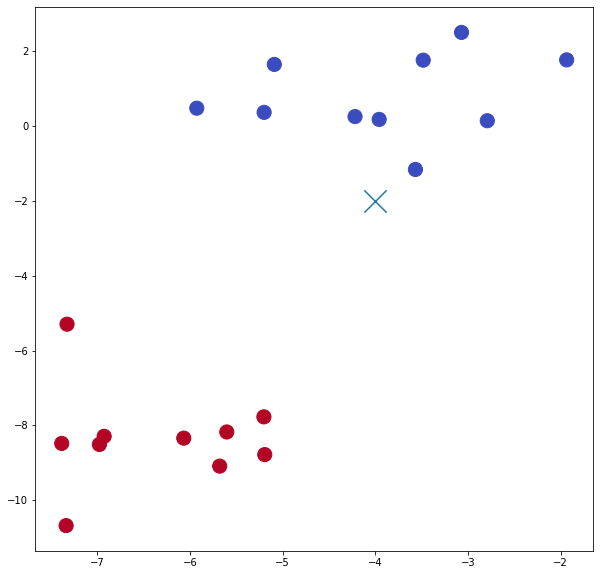

In [2]:
x, y = make_blobs(n_samples=20, n_features=2, centers=2 ,cluster_std=1, random_state=17)
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], s= 200, c = y, cmap=cmap)
plt.scatter(-4, -2, s=500, marker='x')

Основная идея состоит в том, чтобы найти наиболее близкий по параметрам объект в выборке и присвоить его метку тестовому объекту.

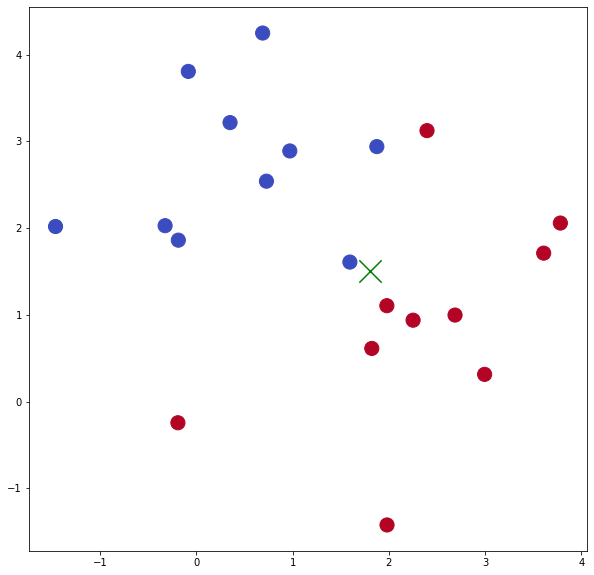

In [3]:
x, y = make_blobs(n_samples=20, n_features=2, centers=2 ,cluster_std=1, random_state=9, center_box=(0,5))
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], s= 200, c = y, cmap=cmap)
plt.scatter(1.8, 1.5, s=500, c='g', marker='x')

In [4]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Построим классификатор. В связи с тем, что алгоритм ищет ближайшее расстояние до некоторого объекта из обучающей выборке, все пространство будет разбито на области в виде ячеек. Эти области будут контролироваться объектами обучающей выборки. Плоскость разделяющая классы объектов будет представлять собой ломанную прямую.
Главное преимущество метода - черезвычайное простое исполнение.

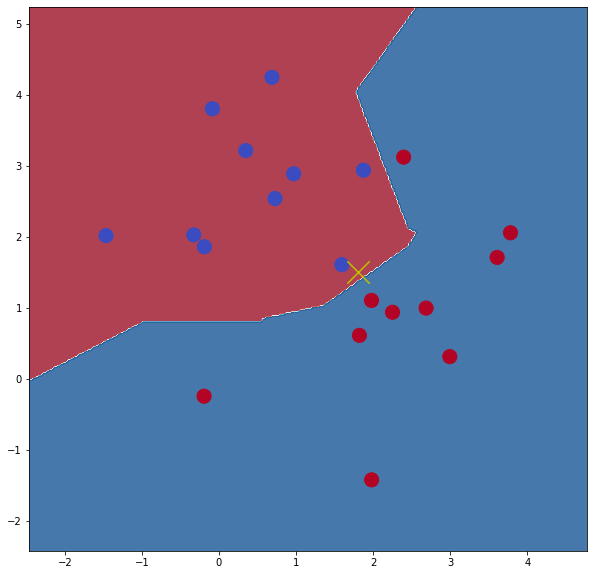

In [5]:
h = .02
x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(1.8, 1.5, s=500, c='y', marker='x')

## Выбросы или ошибки в данных
- Алгоритм очень чувствителен к выбросам или ошибкам. Единственная ошибка в даннных изменяет границу, что очень плохо сказывается на предсказательной способности алгоритма.
- Алгоритм сильно переобучен.

Существует способы уменьшить "переобученность":
- использовать более одного ближайшего соседа. Принимать решение, например, по трем соседям. Таким образом с учеличением числа соседей алгоритм будет становиться более стабильным и иметь более гладкие границы.

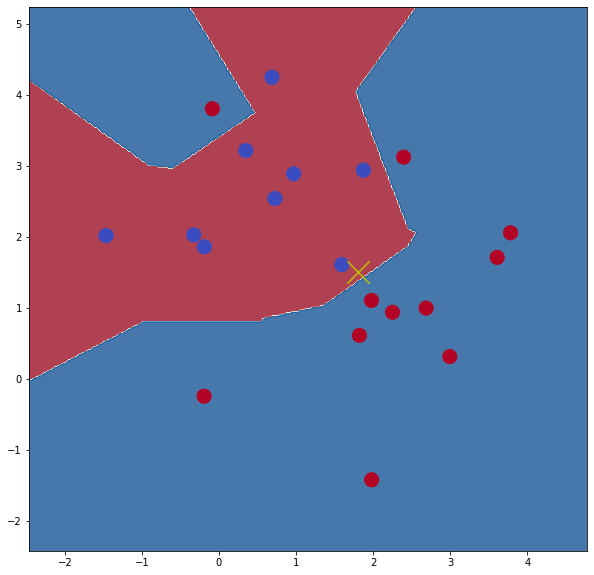

In [6]:
y[-8] = 1
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(1.8, 1.5, s=500, c='y', marker='x')

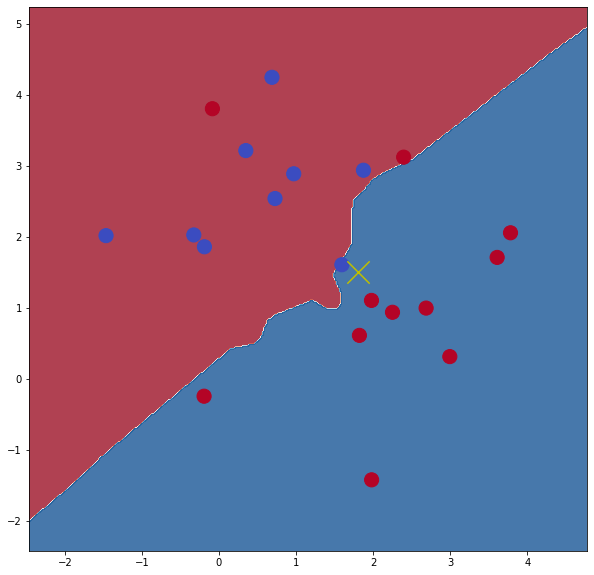

In [7]:
y[-8] = 1
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x,y)
Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
plt.scatter(1.8, 1.5, s=500, c='y', marker='x')

# Классификация и регрессия

## kNN Classification algorithm
Дан тренировочный датасет - $\{x_i, y_i\}$
- $x_i$ - атрибуты примеров из данных
- $y_i$ - метки классов.

In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

In [9]:
x = digits['data']
y = digits['target']
img = digits['images']

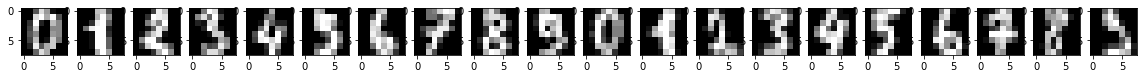

In [10]:
plt.figure(figsize=(20,10))
for it in range(20):
    plt.subplot(1,20,it+1)
    plt.imshow(img[it], cmap=plt.cm.gray)

In [11]:
x.max()

16.0

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

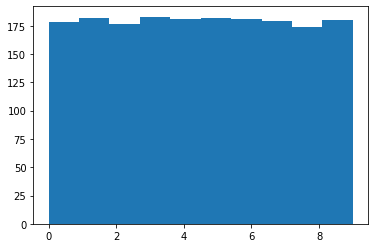

In [12]:
plt.hist(y)

In [13]:
x_train, x_test, y_train, y_test, img_train, img_test = train_test_split(x, y, img, test_size = 0.5, random_state=17)

(array([88., 87., 93., 92., 98., 88., 95., 87., 86., 84.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

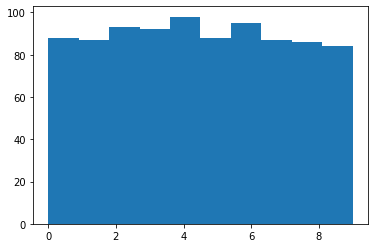

In [14]:
plt.hist(y_train)

Есть данные с рукописными цифрами:
- Размер изображения $6\times6$;
- 4-битовые значения пикселей;

Для некоторого примера производим расчет Эвклидова расстояния между каждым объектом обучающей выборки.

$D(A,B) = \sqrt{\sum_r \sum_c (A_{r,c} - B_{r,c})^2}$

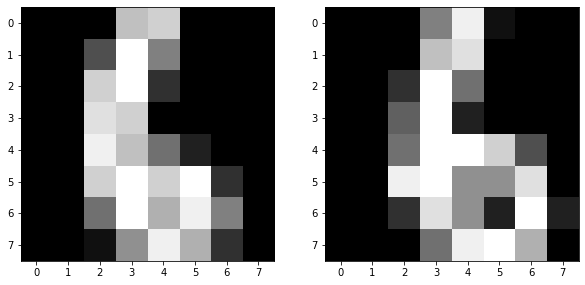

In [15]:
num = 6
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img[num], cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(img[num+10], cmap=plt.cm.gray)

In [16]:
clf = KNeighborsClassifier(n_neighbors=7, weights ='distance')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9721913236929922

[2 2 2 2 8 8 2]


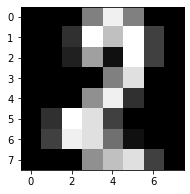

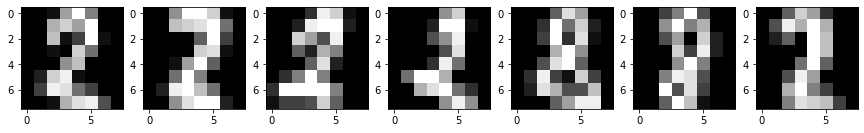

In [17]:
ind = 1
dist, nums = clf.kneighbors(x_test[ind].reshape(1, -1), n_neighbors=7)
plt.figure(figsize=(3,3))
plt.imshow(img_test[ind], cmap=plt.cm.gray)
plt.figure(figsize=(15,10))
for it, num in enumerate(nums[0]):
    plt.subplot(1, len(nums[0]), it+1)
    plt.imshow(img_train[num], cmap=plt.cm.gray)
print(y_train[nums[0]])

[9 9 9 9 9 9 3]


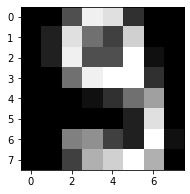

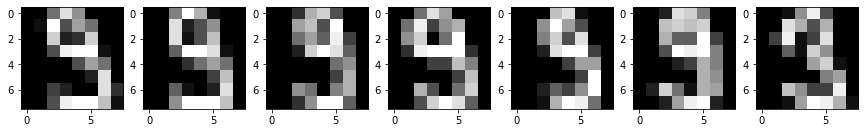

In [18]:
ind = 7
dist, nums = clf.kneighbors(x_test[ind].reshape(1, -1), n_neighbors=7)
plt.figure(figsize=(3,3))
plt.imshow(img_test[ind], cmap=plt.cm.gray)
plt.figure(figsize=(15,10))
for it, num in enumerate(nums[0]):
    plt.subplot(1, len(nums[0]), it+1)
    plt.imshow(img_train[num], cmap=plt.cm.gray)
print(y_train[nums[0]])

## kNN regression algorithm

Дан тренировочный датасет - $\{x_i, y_i\}$
- $x_i$ - атрибуты примеров из данных
- $y_i$ - действительные значения.

Алгоритм:
- Рассчитывается расстояние между объектами.
- Выбирается k ближайших объектов и их меток $y_{i1} ... y_{ik}$.
- Выходное значение - это среднее значение от $y_{i1} ... y_{ik}$

$\hat{y} = f(x) = \frac{1}{k}\sum \limits_{j=1}^{k} y_j$

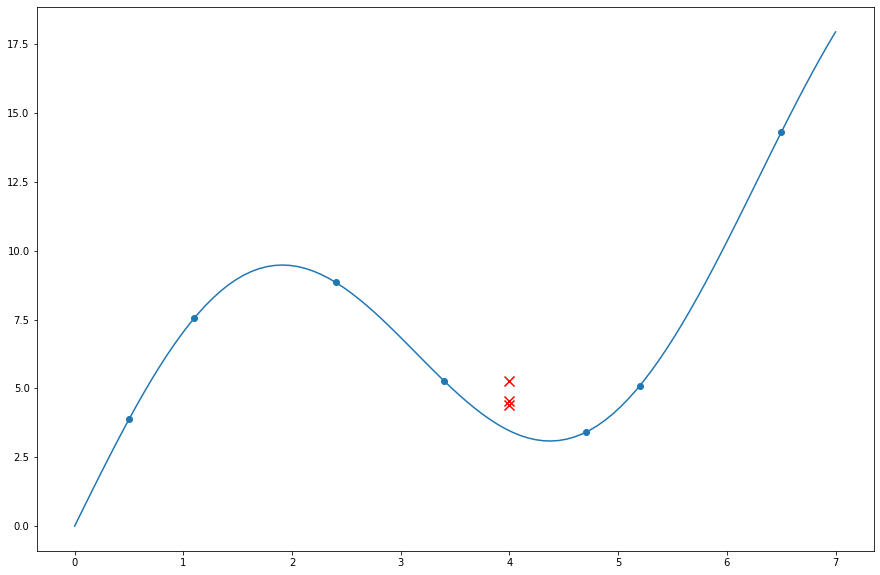

In [19]:
plt.figure(figsize=(15,10))
x_real = np.linspace(0, 7, 100)
y_real = 6 * np.sin(x_real) + 2 * x_real
plt.plot(x_real, y_real)
x = np.array([0.5, 1.1, 2.4, 3.4, 4.7, 5.2, 6.5])
y = 6 * np.sin(x) + 2 * x
plt.scatter(x, y)

clf = KNeighborsRegressor(n_neighbors=1, weights='distance')
clf.fit(x.reshape(-1, 1),y.reshape(-1, 1))
x_pred = np.array([4], dtype=float)
plt.scatter(x_pred, clf.predict(x_pred.reshape(-1, 1)), s = 100, marker='x', c='r')

clf.n_neighbors = 2
plt.scatter(x_pred, clf.predict(x_pred.reshape(-1, 1)), s = 100, marker='x', c='r')

clf.n_neighbors = 3
plt.scatter(x_pred, clf.predict(x_pred.reshape(-1, 1)), s = 100, marker='x', c='r')


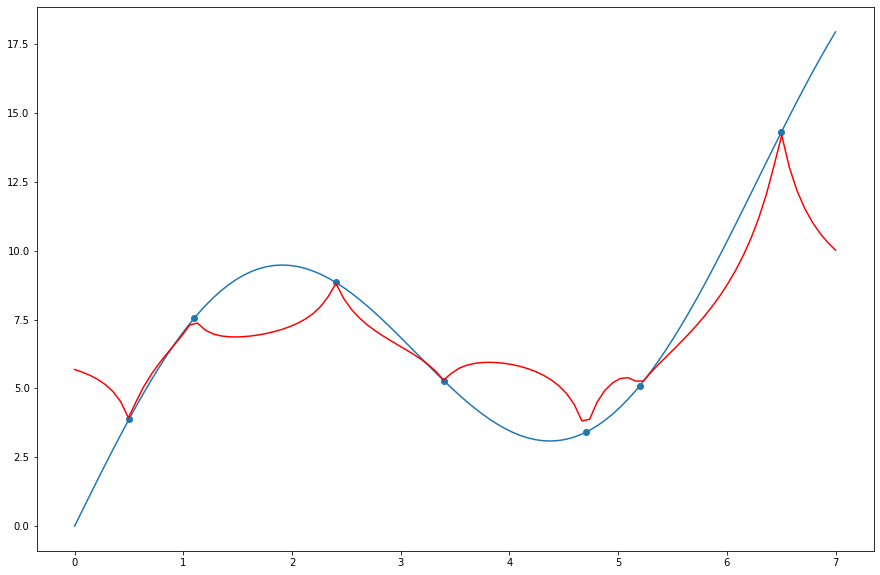

In [20]:
plt.figure(figsize=(15,10))
plt.plot(x_real, y_real)
plt.scatter(x, y)
clf.n_neighbors = 7
plt.plot(x_real, clf.predict(x_real.reshape(-1, 1)), color='r')

## Выбор числа соседей
Большее число соседей означает более вероятный класс для тестового значения

Меньшее число соседей означает неустойчивость в классифкации.

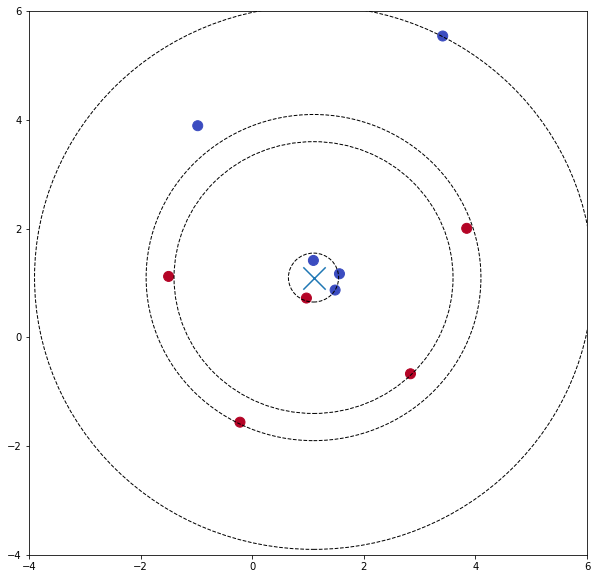

In [21]:
x, y = make_blobs(n_samples=10, n_features=2, center_box=(0,3), centers=2 ,cluster_std=2, random_state=3)
cmap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
ax = plt.gca()
# plt.figure(figsize=(10,10))
ax.set_xlim((-4, 6))
ax.set_ylim((-4, 6))
ax.scatter(x[:,0], x[:,1], s= 100, c = y, cmap=cmap)
ax.scatter(1.1, 1.1, s=500, marker='x')
ax.add_artist(plt.Circle((1.1, 1.1), radius=0.45, fill=False, ls='--'))
ax.add_artist(plt.Circle((1.1, 1.1), radius=2.5, fill=False, ls='--'))
ax.add_artist(plt.Circle((1.1, 1.1), radius=3, fill=False, ls='--'))
ax.add_artist(plt.Circle((1.1, 1.1), radius=5, fill=False, ls='--'))

## Расстояние между объектами
Ключевой компонент алгоритма, так как итоговые алгоритмы будет существенно отличаться при использовании различных метрик расстояний.

### Эвклидово расстояние (численные атрибуты)
Наиболее распрастраненной метрикой является Эвклидово расстояние. Функция симметричкая, сферическа, все признаки равные по своему вкладу.

Есть проблема - чувствительность к выбросам в отдельных атрибутах объекта.

$D(x,x') = \sqrt{\sum_d|x_d - x'_d|^2}$

### Расстояние Хемминга (категориальные атрибуты)

$D(x,x') = \sum_d 1_{x_d \neq x'_d}$

там где атрибуты не совпадают.

### Расстояние Минковского (p-norm)

$D(x,x') = \sqrt[p]{\sum_d|x_d - x'_d|^p}$

### Расстояние Кулюбака-Лейблера

$D(x,x') = -\sum_d x_d \log \frac{x_d}{x'_d}$

## Практические проблемы
- равное количество соседей с одинаковыми метками не позволяет точно провести классификацию.
- приходится использовать нечетное количество, но это может не сработать в мультиклассовой классификации.
- решение проблем:
    - взять класс для тестового случая наугад;
    - воспользоваться 1-nn;
    - давать класс по приоритету.

Отсутствующие атрибуты в данных необходимо заполнять, с пропущенными данными невозможно посчитать расстояние. 
Причем большое значение в одном атрибуте может серьезно повлиять на классификацию.
Лучше всего использовать среднее значение.

## Метод Парзеновского окна

Text(0.5, 1.0, 'Parzen window')

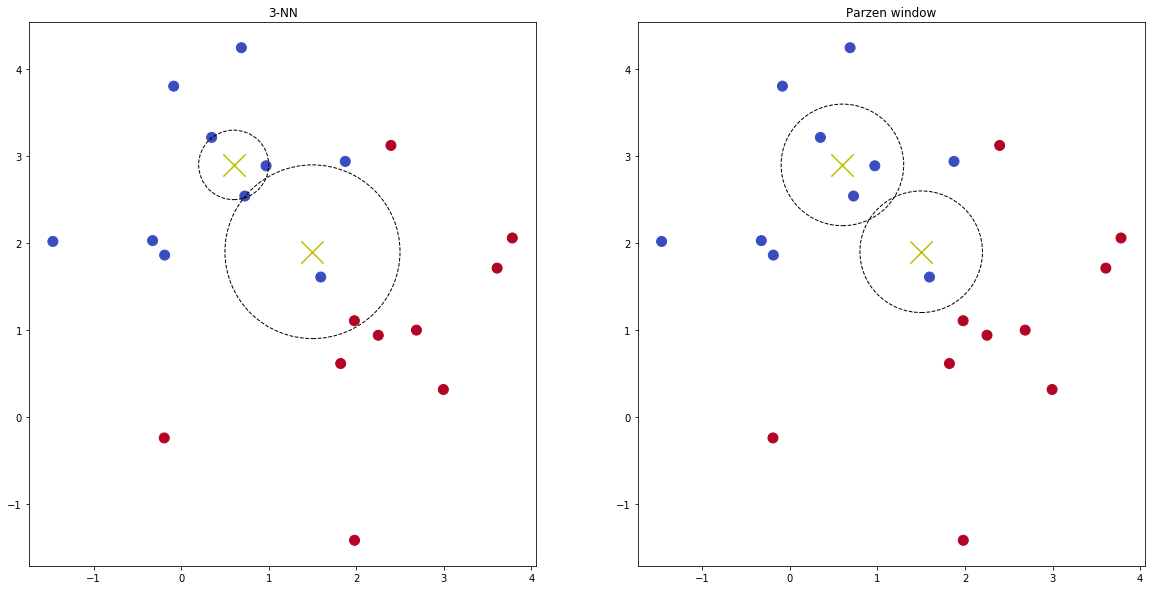

In [22]:
x, y = make_blobs(n_samples=20, n_features=2, centers=2 ,cluster_std=1, random_state=9, center_box=(0,5))
cmap = plt.cm.coolwarm
plt.figure(figsize=(20,10))
# plt.scatter(x[:,0], x[:,1], s= 200, c = y, cmap=cmap)
# plt.scatter(1.5, 1.9, s=500, c='g', marker='x')
plt.subplot(121)
ax = plt.gca()

# ax.set_xlim((-4, 6))
# ax.set_ylim((-4, 6))
ax.scatter(x[:,0], x[:,1], s= 100, c = y, cmap=cmap)
ax.scatter(1.5, 1.9, s=500, marker='x', c='y')
ax.scatter(0.6, 2.9, s=500, marker='x', c='y')
ax.add_artist(plt.Circle((1.5, 1.9), radius=1, fill=False, ls='--'))
ax.add_artist(plt.Circle((0.6, 2.9), radius=0.4, fill=False, ls='--'))
ax.set_title('3-NN')

plt.subplot(122)
ax = plt.gca()

# ax.set_xlim((-4, 6))
# ax.set_ylim((-4, 6))
ax.scatter(x[:,0], x[:,1], s= 100, c = y, cmap=cmap)
ax.scatter(1.5, 1.9, s=500, marker='x', c='y')
ax.scatter(0.6, 2.9, s=500, marker='x', c='y')
ax.add_artist(plt.Circle((1.5, 1.9), radius=0.7, fill=False, ls='--'))
ax.add_artist(plt.Circle((0.6, 2.9), radius=0.7, fill=False, ls='--'))
ax.set_title('Parzen window')

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=None,
                          p=2, radius=2, weights='distance')

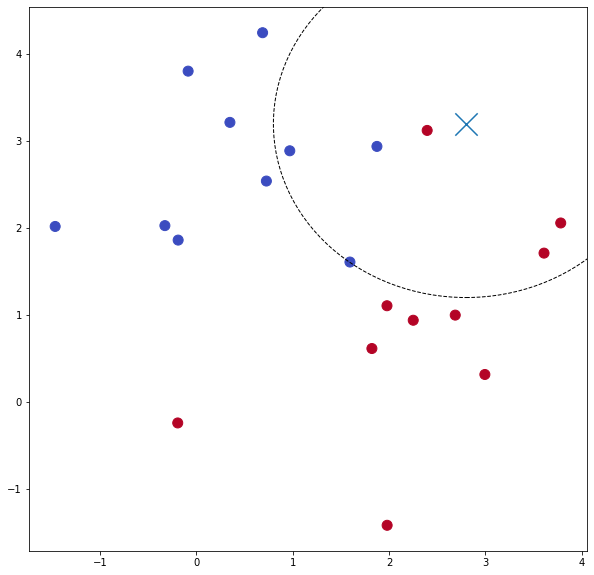

In [23]:
cmap = plt.cm.coolwarm
radius = 2
point = np.array([[2.8, 3.2]])
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.scatter(x[:,0], x[:,1], s= 100, c = y, cmap=cmap)
ax.scatter(point[:,0], point[:,1], s=500, marker='x')
ax.add_artist(plt.Circle((point[:,0], point[:,1]), radius=radius, fill=False, ls='--'))
clf = RadiusNeighborsClassifier(radius=radius, weights='distance')
clf.fit(x, y)

In [24]:
dist, ind = clf.radius_neighbors(point)
print(dist, ind)

[array([1.99634099, 0.96110936, 1.85607433, 1.50617586, 0.41075147,
       1.69425777])] [array([ 0,  1,  2,  8, 11, 18])]


(-0.1, 2)

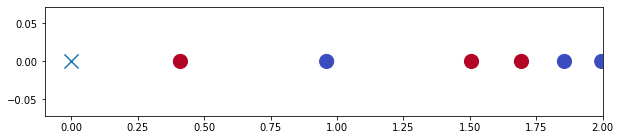

In [25]:
plt.figure(figsize=(10,2))
ax = plt.gca()
ax.scatter(dist[0], np.zeros(dist[0].shape), s = 200, c = y[ind[0]], cmap=cmap)
ax.scatter(0, 0, s = 200, marker='x', cmap=cmap)
# ax.scatter(0, 0, s = 100, cmap=cmap)
ax.set_xlim(-0.1, 2)

In [26]:
clf.predict(np.array([[2.8, 3]]))

array([1])

## Проблемы алгоритма и его ускорение

Очень быстро строится, но очень медленно делает предсказание.

- Сложность построения $O(1)$
- Сложность предсказания $O(nd)$

Варианты:
- Уменьшение d: уменьшение признакового пространства:

- Уменьшение n: сравнение не со всеми объектами тренировочной выборки:
    - взять некоторое количество $m$ объектов, которое во много раз меньше $n$. $-> O(md)$
    - KD деревья: с меньшим количеством данных, для действительные значения. $-> O(d \log n)$, когда $d << n$
    - inverted list для категориальных признаков:
    - fingerprinting.

## Выводы
Плюсы:
- Гладкая граница разделяющая классы.
- Предположение о классе строится только на функции расстояния.
- "Взял данные и классификатор готов" - почти моментальное построение.
- Нечего изменять - только $k$ и расстояние.
- Легко обновлять классификатор простым добавлением данных

Минусы:
- Необходимо вручную вводить недостающие данные.
- Чувствителен к выбросам.
- Чувствителен к большим значениям атрибутов.
- Высокие вычислительные затраты:
    - Необходимо хранить все данные.
    - Время классификации. Необходимо рассчитывать расстояние до всех объектов $O(nd)$
    Соответственно с ростом n классификатор становится медленнее.
    - Вычисление на классификации, а не на построении классификации.